Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


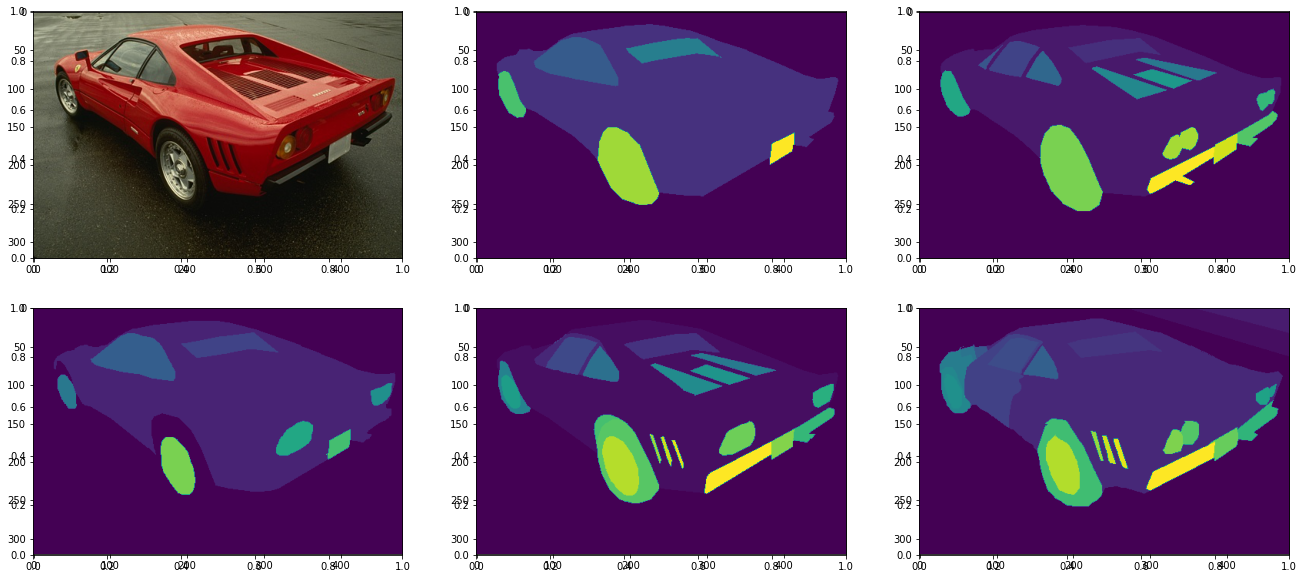

In [ ]:
import numpy as np
# import pandas as pd
# import cv2
import os
import imageio
import scipy.io
import matplotlib.pyplot as plt
import math

from scipy.spatial import distance_matrix
from numpy.random import randint
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors

from google.colab import drive
drive.mount('/content/gdrive')

image_paths = "/content/gdrive/My Drive/BSDS500/images/"
groundTruths_path = "/content/gdrive/My Drive/BSDS500/groundTruth/"

images = []
groundTruths = []
for filename in os.listdir(image_paths):
  if filename != 'Thumbs.db':
    images.append(imageio.imread(image_paths + filename))
    # exclude the extension from the filename (filename[:-4]) in order to be able to read the associated .mat file with the same name
    groundTruths.append(scipy.io.loadmat(groundTruths_path + filename[:-4])["groundTruth"]) # ?????????????????????????????????????????

test_image = 10

# display an image with its associated ground truth segmentation(s)
fig, axs = plt.subplots(2,3, figsize=(22.5,10))
pos = 1
axs = fig.add_subplot(2, 3, pos)
pos+=1

axs.imshow(images[test_image])
for i in range(5):
  axs = fig.add_subplot(2, 3, pos)
  pos += 1
  axs.imshow(groundTruths[test_image][0,i][0,0][0]) # ?????????????????????????????????????????

# x, y, z = images[test_image].shape


for value of k =  3
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


nan
entropy =  0.0
fmeasure =  nan
for value of k =  5
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


nan
entropy =  0.0
fmeasure =  nan
for value of k =  7
0.0
nan
0.0
nan
0.0
nan
0.0
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


0.0
nan
entropy =  0.0
fmeasure =  nan
for value of k =  9
0.0
nan
0.0
nan
0.0
nan
0.0
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


0.0
nan
entropy =  0.0
fmeasure =  nan
for value of k =  11
0.0
nan
0.0
nan
0.0
nan
0.0
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


0.0
nan
entropy =  0.0
fmeasure =  nan


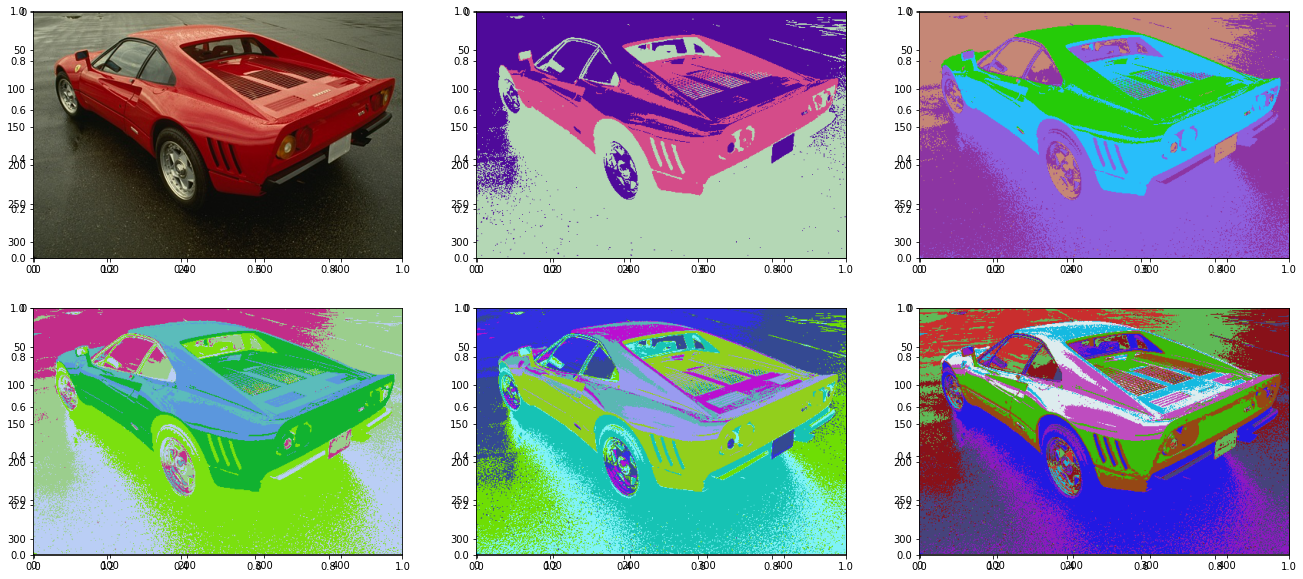

In [ ]:

# groundTruth = groundTruths[test_image][0,0][0,0][0].reshape(154401).tolist()

def map_classes_clusters(clusters, k, groundTruth):
  
  n = len(np.unique(groundTruth))

  # print(n)

  mp = np.zeros((n,k))
  for i in range(n):
    for j in range(k):
      mp[i][j] = 0;
  for i in range(n):
    mp[groundTruth[i]][clusters[i]] = mp[groundTruth[i]][clusters[i]]+1;
  
  # print("\n", mp, "\n")
  
  return mp

def totalSum(arr, k):
  # print("arr", arr)
  sum = 0;
  for i in range(k):
    sum += arr[i];
  return sum

def evaluate_cond_entropy(clusters, k, groundTruth):
    
  n = len(np.unique(groundTruth))

  mp = map_classes_clusters(clusters, k, groundTruth)

  for i in range(n):
    sum = totalSum(mp[i],k)
    entropy =0;
    for j in range(k):
      if(mp[i][j] != 0):
      #   entropy -=(mp[i][j]/sum)
      # else: 
        entropy -= (mp[i][j]/sum) * math.log2(mp[i][j]/sum)
    entropy += entropy * (sum/154401)
  print(entropy)
  return entropy

def evaluate_fmeasure(clusters, k, groundTruth):

  n = len(np.unique(groundTruth))
  
  mp = map_classes_clusters(clusters,k, groundTruth)

  # print(mp)

  f = 0
  for i in range(n):

    # print("mp[i]", mp[i])

    sum = totalSum(mp[i],k)
    prec = np.amax(mp[i])/sum
    indx = np.argmax(mp[i])

    # print("mp[:,indx]", indx)

    recall = np.amax(mp[i])/totalSum(mp[:,indx],len(mp[:,indx]))
    f += (2*prec*recall)/(prec+recall)
  print(f/k)
  return f/k

# reshape image for applying kmeans clustering on the RGB feature of each pixel

x, y, z = images[test_image].shape
image_2d = images[test_image].reshape(x*y, z)

fig, axs = plt.subplots(2,3, figsize=(22.5,10))
pos = 1
axs = fig.add_subplot(2, 3, pos)
pos+=1

axs.imshow(images[test_image])

for k in [3,5,7,9,11]:
# for k in [3,5]:

  print("for value of k = ", k)

  kmeans = KMeans(n_clusters=k).fit(image_2d)
 
 # You will produce different segmentations and save them as colored images. Every color represents a certain group (cluster) of pixels.

  out_image = np.zeros(image_2d.shape, dtype=np.uint8)
  
  colors = []

  for i in range(k):
    colors.append(np.array([randint(0,255), randint(0,255), randint(0,255)]))

  for i in range(out_image.shape[0]):
    out_image[i] = colors[kmeans.labels_[i]]

  out_image = out_image.reshape(x, y, z)

  axs = fig.add_subplot(2, 3, pos)
  pos+=1
  axs.imshow(out_image)

# We will evaluate the result segmentation using F-measure, Conditional Entropy
  entropy = 0
  fmeasure = 0

  for j in range(5):
    truth = groundTruths[test_image][0,j][0,0][0].reshape(154401).tolist()
    entropy += evaluate_cond_entropy(kmeans.labels_, k, truth)
    fmeasure += evaluate_fmeasure(kmeans.labels_, k, truth)
  
  print("entropy = ", entropy/5)
  print("fmeasure = ", fmeasure/5)


In [ ]:
def purityOfEachClass(labels, groundTruth, k, sorted=True):
  
  groundTruthLabelsNumber = len(np.unique(groundTruth)) + 1

  dataInClusterindexies = []
  for i in range(k):
    dataInClusterindexies.append([])
  for i in range(len(groundTruth)):
    dataInClusterindexies[labels[i]].append(i)
  listNij = []
  for i in range(k):
    list = [0] * (groundTruthLabelsNumber)
    listNij.append(list)

  for i in range(k):
    for j in range(len(dataInClusterindexies[i])):
      listNij[i][groundTruth[dataInClusterindexies[i][j]]] += 1
  finalListNij = []
  for i in range(k):
    list = [0] * (groundTruthLabelsNumber)
    finalListNij.append(list)

  for i in range(k):
    for j in range(groundTruthLabelsNumber):
      finalListNij[i][j] = (listNij[i][j], j + 1)

  groundtruthList = [0] * (groundTruthLabelsNumber)

  for j in range(groundTruthLabelsNumber):
    sum = 0
    for i in range(k):
      sum += finalListNij[i][j][0]
    groundtruthList[j] = sum

  if sorted == True:
    for i in range(k):
      finalListNij[i].sort(reverse=True)

  # print(groundTruthLabelsNumber)

  return finalListNij, groundtruthList, groundTruthLabelsNumber

#########################################################################################################################################################

def calculateF_Measure(labels, groundTruth, k):
  listNij, groundtruthList, groundTruthLabelsNumber = purityOfEachClass(labels, groundTruth, k)
  NumberOfElementsInEachCluster = [0] * k
  for i in range(k):
    for j in range(len(listNij[i])):
      NumberOfElementsInEachCluster[i] += listNij[i][j][0]
  listF_measure = [0]*k
  for i in range(k):
    if NumberOfElementsInEachCluster[i] == 0:
      listF_measure[i] = 0
    else:
      if i > (len(groundtruthList) - 1):
        listF_measure[i] = ((2 * listNij[i][0][0]) / (NumberOfElementsInEachCluster[i]))
      else:
        listF_measure[i] = ((2 * listNij[i][0][0]) / (NumberOfElementsInEachCluster[i] + groundtruthList[listNij[i][0][1]-1]))
  sum = 0
  for i in range(k):
    sum += listF_measure[i]
  f_Measure = sum / k
  print("fmeasure per segment", f_Measure)
  return f_Measure

#########################################################################################################################################################

def calculateConditionalEntropy(labels, groundTruth, k):
  listNij, groundtruthList, groundTruthLabelsNumber = purityOfEachClass(labels, groundTruth, k, sorted=False)
  sizeOfData = len(groundTruth)
  numberOfElementsInEachCluster = [0] * k
  entropyOfEachCluster = [0] * k

  for i in range(k):
    for j in range(groundTruthLabelsNumber):
      numberOfElementsInEachCluster[i] += listNij[i][j][0]
  for i in range(k):
    for j in range(groundTruthLabelsNumber):
      if numberOfElementsInEachCluster[i] != 0:
        tempValue = listNij[i][j][0] / numberOfElementsInEachCluster[i]
      if tempValue != 0:
        entropyOfEachCluster[i] += (-tempValue) * math.log2((tempValue))

  entropy = 0
  for i in range(k):
      entropy += (numberOfElementsInEachCluster[i] / sizeOfData) * entropyOfEachCluster[i]
  print("entropy per segment = ", entropy)
  return entropy

#########################################################################################################################################################

def evaluate_entropy_fmeasure(clustersLabels, groundTruths , k):
  cond_entropy = 0
  fMeasure = 0
  
  for groundTruth in groundTruths:
    cond_entropy += calculateConditionalEntropy(clustersLabels, groundTruth, k)
    fMeasure += calculateF_Measure(clustersLabels, groundTruth, k)
  
  print("\naverage F-measure = ", fMeasure/5)
  print("average conditional entropy = ", cond_entropy/5)

#########################################################################################################################################################

groundTruths_perImage = []

for j in range(5):
  groundTruths_perImage.append(groundTruths[test_image][0,j][0,0][0].reshape(154401).tolist())

for k in [3,5,7,9,11]:

  print("\nfor value of k = ", k)

  kmeans = KMeans(n_clusters=k).fit(image_2d)
  
  evaluate_entropy_fmeasure(kmeans.labels_, groundTruths_perImage, k=k)



for value of k =  3
entropy per segment =  1.0538045522165158
fmeasure per segment 0.6143021368520505
entropy per segment =  1.3392702998845893
fmeasure per segment 0.6036216919117733
entropy per segment =  1.0183073506905405
fmeasure per segment 0.6146449320105954
entropy per segment =  1.4528201012350828
fmeasure per segment 0.6086900301820313
entropy per segment =  1.7180315209643342
fmeasure per segment 0.5815922249963034

average F-measure =  0.6045702031905508
average conditional entropy =  1.3164467649982126

for value of k =  5
entropy per segment =  0.755959590956002
fmeasure per segment 0.5231689209163841
entropy per segment =  1.0386080689361197
fmeasure per segment 0.5231515458282473
entropy per segment =  0.71815025838879
fmeasure per segment 0.5251110038934153
entropy per segment =  1.1284717175579106
fmeasure per segment 0.5306312051013934
entropy per segment =  1.449220854406247
fmeasure per segment 0.5093998843501227

average F-measure =  0.5222925120179125
average co

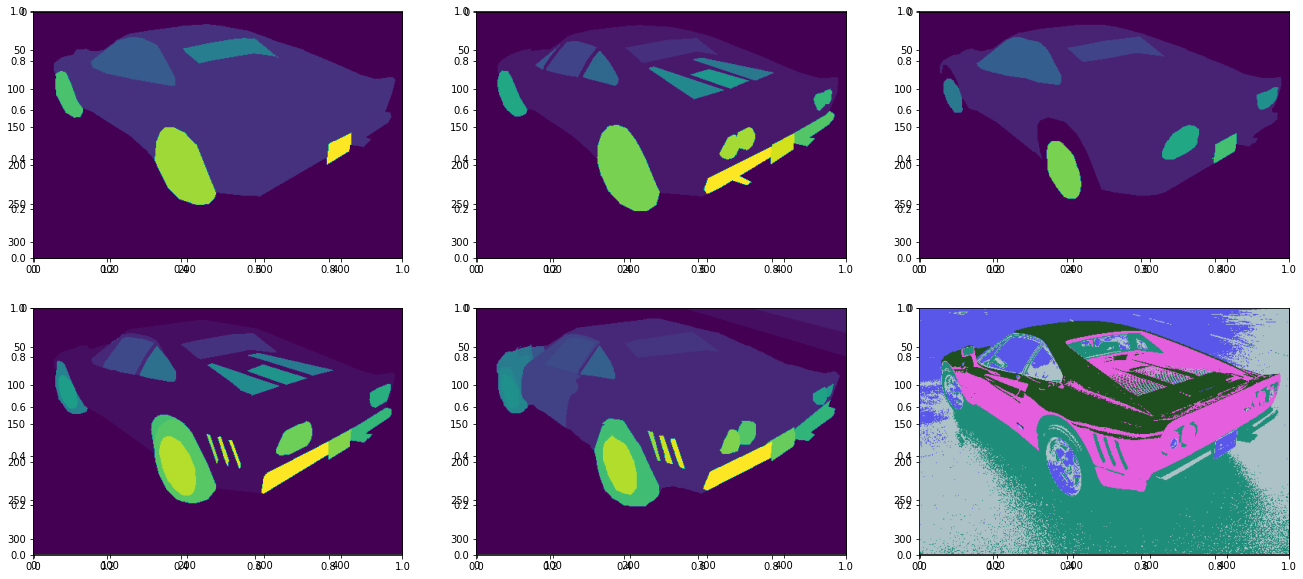

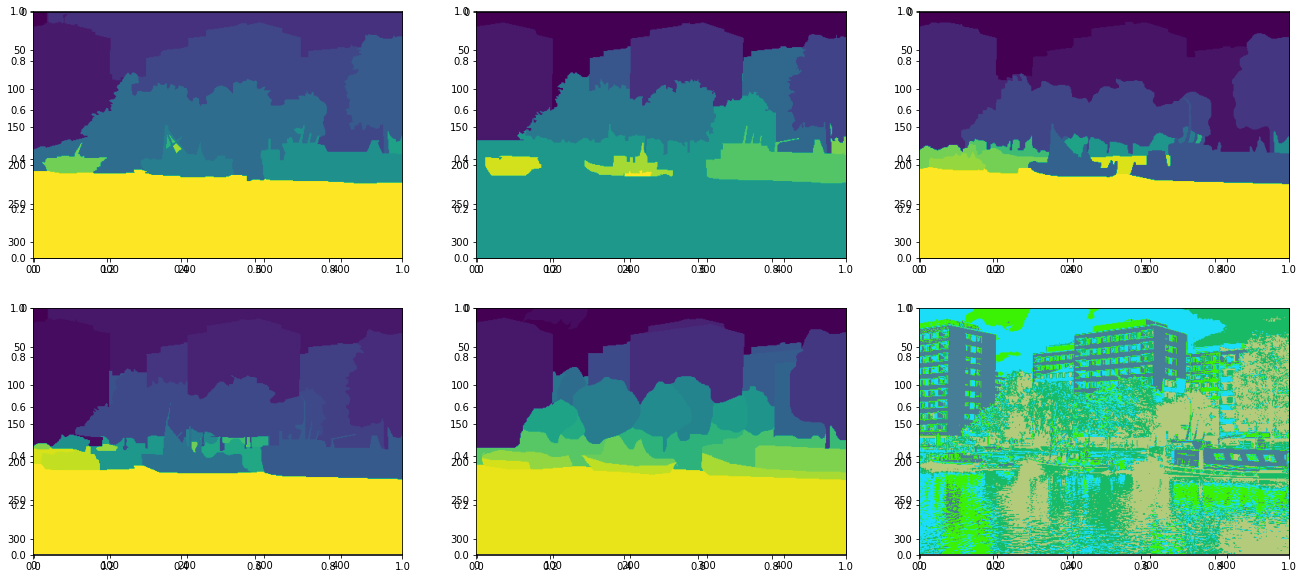

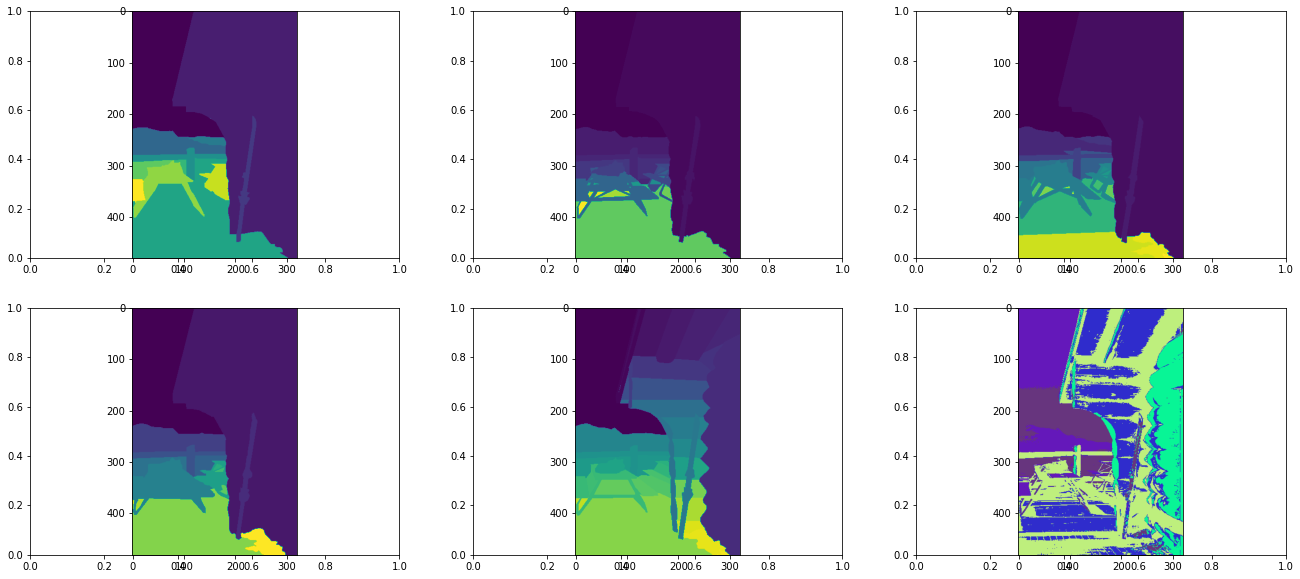

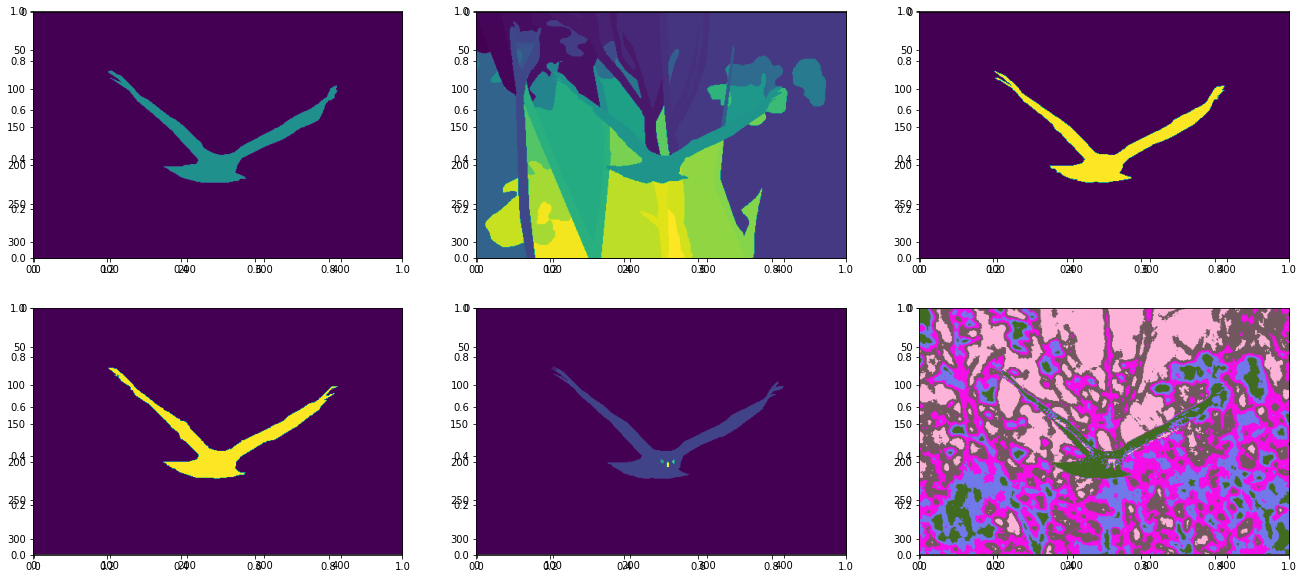

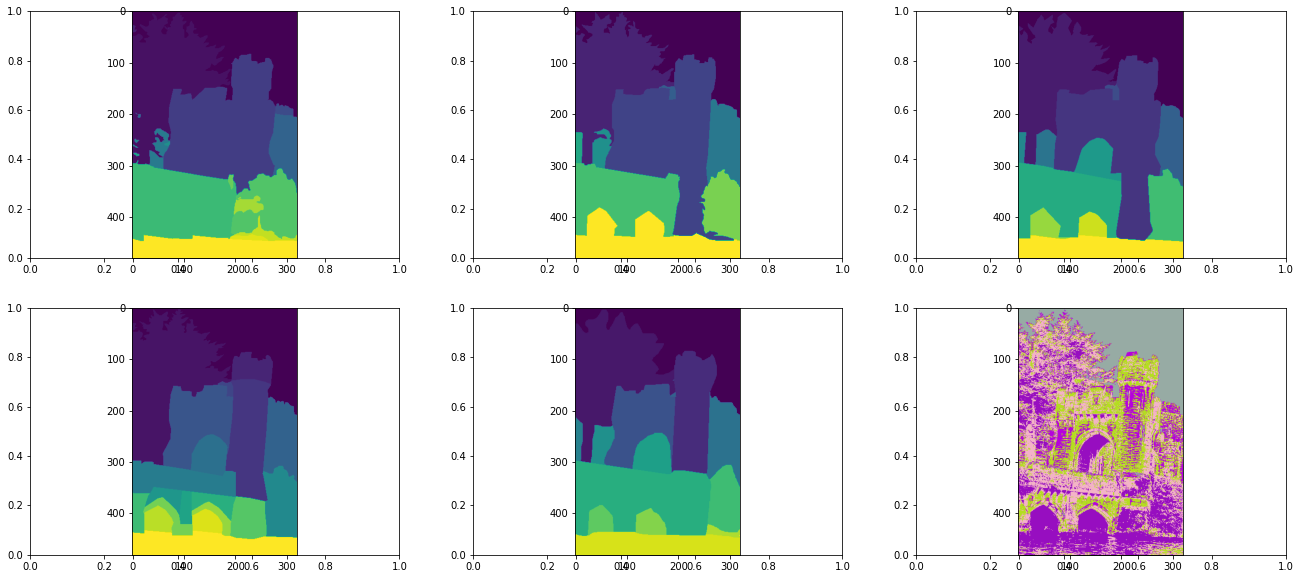

In [ ]:
# part 4

# Big Picture

# Select a set of five images and display their corresponding ground truth against your segmentation results using K-means at K=5. Comment on the results.

# Select the same five images and display their corresponding ground truth against your segmentation results using Normalized-cut for the 5-NN graph, at K=5. Comment on the results

# Select the same five images and contrast your segmentation results using Normalized-cut for the 5-NN graph, at K=5 versus using K-means at K=5. Comment on the results.

test_images = [10, 11, 12, 13, 14]

k = 5
n = 5

for test_image in test_images:
  
  fig, axs = plt.subplots(2,3, figsize=(22.5,10))
  pos = 1
  
  for i in range(5):
    axs = fig.add_subplot(2, 3, pos)
    pos+=1
    axs.imshow(groundTruths[test_image][0,i][0,0][0]) 

  x, y, z = images[test_image].shape
  image_2d = images[test_image].reshape(x*y, z)

  kmeans = KMeans(n_clusters=k).fit(image_2d)

  out_image = np.zeros(image_2d.shape, dtype=np.uint8)

  colors = []

  for i in range(k):
    colors.append(np.array([randint(0,255), randint(0,255), randint(0,255)]))

  for i in range(out_image.shape[0]):
    out_image[i] = colors[kmeans.labels_[i]]

  out_image = out_image.reshape(x, y, z)
  axs = fig.add_subplot(2, 3, pos)
  pos+=1
  axs.imshow(out_image)

  # Segmentation using Normalized-cut

  # clustering = SpectralClustering(n_clusters=k, random_state=0, n_neighbors=n).fit(image_2d)
  
  # out_image = np.zeros(image_2d.shape, dtype=np.uint8)

  # colors = []

  # for i in range(k):
  #   colors.append(np.array([randint(0,255), randint(0,255), randint(0,255)]))

  # for i in range(out_image.shape[0]):
  #   out_image[i] = colors[kmeans.labels_[i]]

  # out_image = out_image.reshape(x, y, z)
  # plt.figure()
  # plt.imshow(out_image)

